# Task :Classification of Amazon-Reviews into two categories (Positive or Negative) Using LSTM

In [1]:
#importing required libraries
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

C:\Users\Gangadhar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
#uploading the required data
#from google.colab import files
#uploaded = files.upload()

Saving amazon_reviews_final.csv to amazon_reviews_final.csv


In [2]:
#importing data into pandas dataframe
#df = pd.read_csv(io.StringIO(uploaded['amazon_reviews_final.csv'].decode('utf-8')))
#df1 = df.head(50000)
#importing required data into pandas dataframe
df1 = pd.read_csv("amazon_reviews_final.csv")

In [3]:
#sepearating text and polarity score
reviews = df1.Text.values
labels = df1.Score.values

In [4]:
#taking first 70% data_points as training data and rest as test_data
X_train = reviews[0:35000]
X_test = reviews[35000:50000]
y_train = labels[0:35000]
y_test = labels[35000:50000]

In [5]:
#checking the frequency of each word
from collections import Counter

freq_word = Counter()

for row in X_train:
    freq_word.update(row.split(" "))
print("Vocabulary size for reviews:", len(freq_word.keys()))


Vocabulary size for reviews: 23323


In [6]:
#getting the vocabulary
vocabulary = list(freq_word.keys())
#print(vocabulary)

In [7]:
#checking the frequencies of words in the vaocabulary
#print(dict(freq_word))
vocab_dict = dict(freq_word)

In [8]:
#selecting top-5000 words
#top_5000 = dict(Counter(vocab_dict).most_common(5000))
#rannking each word based on their frequecy
word_rank = {key: rank for rank, key in enumerate(sorted(vocab_dict, key=vocab_dict.get, reverse=True), 1)}
#print(top_5000)
#print(word_rank)
vocab = list(word_rank.keys())
top_5000 = vocab[0:5000]
print(top_5000[0:100])

['not', 'like', 'tast', 'product', 'good', 'flavor', 'use', 'love', 'great', 'veri', 'tri', 'coffe', 'get', 'make', 'tea', 'more', 'food', 'would', 'buy', 'time', 'order', 'realli', 'eat', 'price', 'dont', 'dog', 'much', 'amazon', 'bag', 'cup', 'well', 'littl', 'water', 'find', 'even', 'drink', 'im', 'best', 'ive', 'go', 'store', 'day', 'better', 'look', 'purchas', 'year', 'brand', 'mix', 'want', 'recommend', 'box', 'sugar', 'packag', 'first', 'give', 'work', 'made', 'sweet', 'bought', 'way', 'found', 'high', 'think', 'need', 'say', 'pack', 'treat', 'know', 'nice', 'differ', 'chocol', 'review', 'free', 'thing', 'cat', 'sinc', 'enjoy', 'delici', 'could', 'bit', 'lot', 'add', 'keep', 'favorit', 'bottl', 'perfect', 'mani', 'got', 'hot', 'come', 'never', 'still', 'sauc', 'cant', 'fresh', 'oil', 'everi', 'take', 'ingredi', 'ship']


In [9]:
#changing text into integer values
def reviews_to_integers(reviews):
    reviews_to_int = []
    for i in range(len(reviews)):
      #for word in word_rank.keys():
      to_int = [word_rank[word] for word in reviews[i].split() if word in top_5000]
      reviews_to_int.append(to_int)
    return reviews_to_int

X_train_final = reviews_to_integers(X_train)

In [10]:
#getting the review after chaniging into integer
print(X_train_final[1])

[292, 57, 793, 3246, 2649, 16, 1568, 6, 2350, 81, 292, 22, 5, 1040, 129, 1152, 212]


In [11]:
#spliting the text reviews into words
def review_test(reviews):
  review_split =[]
  for i in range(len(reviews)):
    words = reviews[i].split()
    to_int = [word_rank[word] for word in words if word in top_5000]
    review_split.append(to_int)
  return review_split
 
X_test_final = review_test(X_test)  

In [12]:
#getting the review after changing into integer for test reviews
X_test_final[1]

[421,
 460,
 1958,
 63,
 2,
 35,
 43,
 86,
 193,
 431,
 21,
 205,
 66,
 150,
 2,
 6,
 2208,
 6,
 236,
 806,
 80,
 411,
 3,
 46,
 1104,
 1534,
 197,
 114]

In [13]:
# truncate and/or pad input sequences
max_review_length = 200
X_train1 = sequence.pad_sequences(X_train_final, maxlen=max_review_length)
X_test1 = sequence.pad_sequences(X_test_final, maxlen=max_review_length)

print(X_train1.shape)
print(X_train1[1])

(35000, 200)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  292   57  793 3246 2649   16 1568    6 2350   81  292   2

In [14]:
#lists for appending the results of each model
train_loss_list =[];
test_loss_list =[];
train_accuracy_list =[];
test_accuracy_list = []

# LSTM For Sequence Classification With Dropout 

In [22]:
# create the model
embedding_vecor_length = 16
model1 = Sequential()
model1.add(Embedding(5000, embedding_vecor_length, input_length=max_review_length))
model1.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())
#training the model
history1 = model1.fit(X_train1, y_train, batch_size=128,epochs=10,verbose=1,validation_data=(X_test1, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 16)           80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 82,129
Trainable params: 82,129
Non-trainable params: 0
_________________________________________________________________
None
Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 152s 4ms/step - loss: 0.3882 - acc: 0.8462 - val_loss: 0.2662 - val_acc: 0.8925
Epoch 2/10
35000/35000 [==============================] - 150s 4ms/step - loss: 0.2281 - acc: 0.9114 - val_loss: 0.2459 - val_acc: 0.9022
Epoch 3/10
35000/35000 [==============================] - 151s 4ms/step

In [23]:
##evaluating on test-data
[test_loss1, test_acc1] = model1.evaluate(X_test1, y_test)
[train_loss1, train_acc1] = model1.evaluate(X_train1, y_train)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss1, test_acc1*100))
train_loss_list.append(train_loss1)
test_loss_list.append(test_loss1)
train_accuracy_list.append(train_acc1)
test_accuracy_list.append(test_acc1)

35000/35000 [==============================] - 139s 4ms/step
Evaluation result on Test Data : Loss = 0.2535703798850377, accuracy = 90.26666666666667%


Text(0.5,1,'Accuracy Curves')

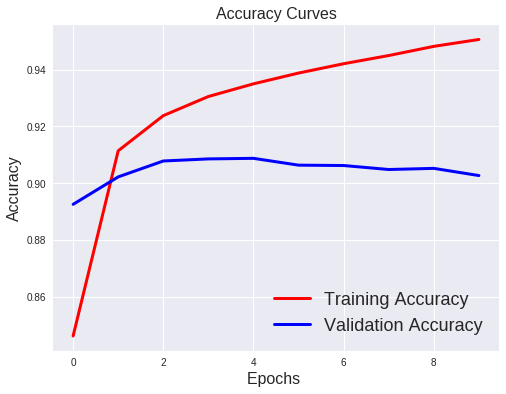

In [29]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['acc'],'r',linewidth=3.0)
plt.plot(history1.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


# Stacked LSTM for sequence classification with Dropout

In [24]:
# create the model
embedding_vecor_length = 16
model2 = Sequential()
model2.add(Embedding(5000, embedding_vecor_length, input_length=max_review_length))
model2.add(LSTM(100, return_sequences=True,input_shape=(n_timesteps,n_features)))
model2.add(LSTM(100))
model2.add(Dropout(0.5))
model2.add(Dense(n_outputs, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())
#training the model
history2 = model2.fit(X_train1, y_train, batch_size=128,epochs=10,verbose=1,validation_data=(X_test1, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 16)           80000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 200, 100)          46800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 207,301
Trainable params: 207,301
Non-trainable params: 0
_________________________________________________________________
None
Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 261s 7ms/step - loss: 0

In [25]:
##evaluating on test-data
[test_loss2, test_acc2] = model2.evaluate(X_test1, y_test)
[train_loss2, train_acc2] = model2.evaluate(X_train1, y_train)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss2, test_acc2*100))
train_loss_list.append(train_loss2)
test_loss_list.append(test_loss2)
train_accuracy_list.append(train_acc2)
test_accuracy_list.append(test_acc2)


35000/35000 [==============================] - 221s 6ms/step
Evaluation result on Test Data : Loss = 0.3133933385714889, accuracy = 90.46666666666667%


Text(0.5,1,'Accuracy Curves')

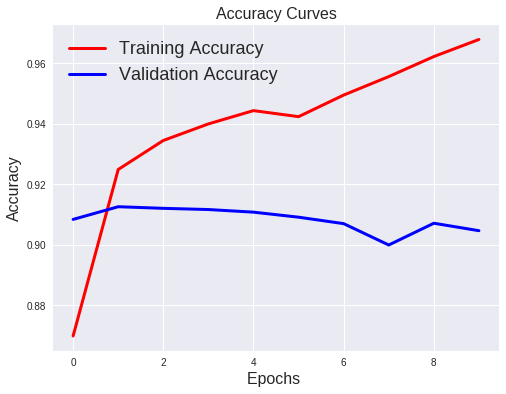

In [26]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


# Conclusions

In [27]:
!pip install prettytable

In [28]:
#reporting the results in a table
order_list = [0,1,2]

from prettytable import PrettyTable
for i in order_list:
  t= PrettyTable()
  t.field_names =["metric/parameter" , "result"]
  t.add_row (["Model" ,"Classification"])
  t.add_row(["Algorithm","LSTM"])
  t.add_row(["Activation","sigmoid"])
  t.add_row(["optimizer","Adam"])
  t.add_row(["Padding","Yes"])
  t.add_row(["Dropout","Yes"])
  t.add_row (["Train-logloss" ,round(train_loss_list[i],2)])
  t.add_row (["Test-logloss" ,round(test_loss_list[i],2)])
  t.add_row(["Train-accuracy",round(train_accuracy_list[i]*100,2)])
  t.add_row(["Test-accuracy",round(test_accuracy_list[i]*100,2)])
  print(t)
    

+------------------+----------------+
| metric/parameter |     result     |
+------------------+----------------+
|      Model       | Classification |
|    Algorithm     |      LSTM      |
|    Activation    |    sigmoid     |
|    optimizer     |      Adam      |
|     Padding      |      Yes       |
|     Dropout      |      Yes       |
|  Train-logloss   |      0.1       |
|   Test-logloss   |      0.27      |
|  Train-accuracy  |     96.64      |
|  Test-accuracy   |     90.39      |
+------------------+----------------+
+------------------+----------------+
| metric/parameter |     result     |
+------------------+----------------+
|      Model       | Classification |
|    Algorithm     |      LSTM      |
|    Activation    |    sigmoid     |
|    optimizer     |      Adam      |
|     Padding      |      Yes       |
|     Dropout      |      Yes       |
|  Train-logloss   |      0.11      |
|   Test-logloss   |      0.25      |
|  Train-accuracy  |     96.14      |
|  Test-accu